In [50]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch as Patch
import numpy as np
import pandas as pd
import time
import os

from sklearn.manifold import LocallyLinearEmbedding 
from sklearn.manifold import MDS
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [2]:
outdir = './data/processed_data'

In [3]:
 # read data from the file and plot 
filename = os.path.join(outdir, f"diabetes_data_train.csv" )    
X_diabetes_train = pd.read_csv(filename)

In [4]:
X_diabetes_train.shape

(183824, 21)

### Locally Linear Embedding on Diabetes dataset

In [5]:
#embedding = MDS(n_components=2, normalized_stress='auto')
#X_transformed = embedding.fit_transform(X_diabetes_train[:100])
#X_transformed.shape

In [6]:

scaler = StandardScaler()
X_diabetes_Scaled = scaler.fit_transform(X_diabetes_train)

In [43]:
%%time
reconstruction_errs = []
components = [2,6,8,10,12,14,16]

for component in components:
    temp_lle = LocallyLinearEmbedding(n_components=component, n_neighbors=5)
    X_diabetese_fitted = temp_lle.fit(X_diabetes_Scaled[:10000]) 
    reconstruction_errs.append(X_diabetese_fitted.reconstruction_error_)

reconstruction_errs

CPU times: total: 11min 55s
Wall time: 5min 21s


[1.1420588220244206e-17,
 1.0009508189174861e-16,
 1.8723882948624832e-16,
 -4.7652034628074774e-15,
 -5.7182441553689736e-15,
 -6.67128484793047e-15,
 -7.624325540491963e-15]

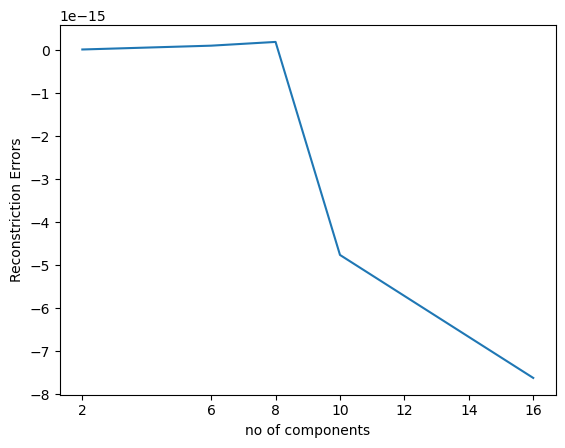

In [44]:

my_xticks = components
plt.xticks(components, my_xticks)
plt.plot(components, reconstruction_errs)
plt.xlabel('no of components')
plt.ylabel('Reconstriction Errors')
#plt.grid(axis='y', linestyle='-')
plt.show()

### Fit and Transform the diabetes dataset using LLE 

In [ ]:
%%time
diabetese_lle = LocallyLinearEmbedding(n_components=10, n_neighbors=5, eigen_solver='dense') 
X_diabetes_lle = diabetese_lle.fit_transform(X_diabetes_Scaled[:20000]) 
X_diabetes_lle.shape

#### Store reduced diabetes dataframe to file 

In [ ]:
diabetes_df_reduced = pd.DataFrame(X_diabetes_lle)

In [ ]:
outdir = './data/processed_data'
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [ ]:
diabetes_df_reduced.to_csv(os.path.join(outdir,f"reduced_diabetes_lle.csv" ),index=False)

## LLE Car Insurance Claim Dataset

In [12]:
# read data from the file and plot 
filename = os.path.join(outdir, f"insurance_data_train.csv" )    
insurance_df = pd.read_csv(filename)

In [45]:
insurance_df.shape

(46873, 40)

In [51]:
scaler = StandardScaler()
X_Insurance_Scaled = scaler.fit_transform(insurance_df)

In [74]:
%%time
reconstruction_ins_errs = []
components = [2,4,6,8,10,12,14,16,18,20]

for n_component in components:
    temp_lle = LocallyLinearEmbedding(n_components=n_component, n_neighbors=3,eigen_solver='dense')
    X_insurance_fitted = temp_lle.fit(X_Insurance_Scaled[:10000]) 
    reconstruction_ins_errs.append(X_insurance_fitted.reconstruction_error_)

CPU times: total: 29min 24s
Wall time: 12min 56s


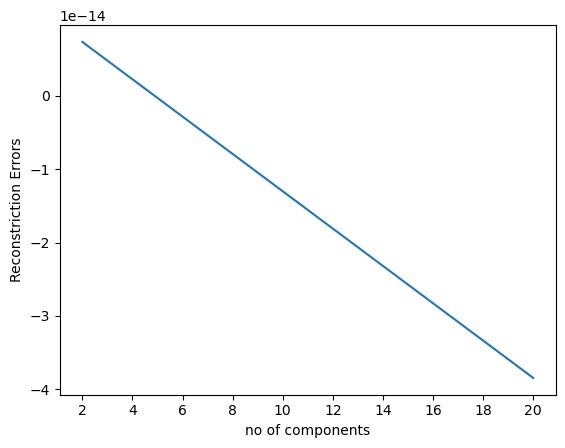

In [75]:
my_xticks = components
plt.xticks(components, my_xticks)
plt.plot(components, reconstruction_ins_errs)
plt.xlabel('no of components')
plt.ylabel('Reconstriction Errors')
#plt.grid(axis='y', linestyle='-')
plt.show()

In [ ]:
%%time
insurance_lle = LocallyLinearEmbedding(n_components=20, n_neighbors=3, eigen_solver='dense') 
X_insurance_lle = insurance_lle.fit_transform(insurance_df) 
X_insurance_lle.shape

In [ ]:
X_insurance_lle.head()

In [ ]:
insurance_df_reduced = pd.DataFrame(X_insurance_lle)

In [ ]:
insurance_df_reduced.to_csv(os.path.join(outdir,f"reduced_insurance_lle.csv" ),index=False)